In [47]:
"""Initialize and import modules"""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [4]:
"""Load raw files"""
car_price = pd.read_csv(r'C:\Users\npatel\Desktop\Upgrad\CarPrice_Assignment.csv')
data_dict = pd.read_excel(r'C:\Users\npatel\Desktop\Upgrad\Data Dictionary - carprices.xlsx')

"""Verify Loaded data"""
print(car_price.head())
print(data_dict.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsep

In [6]:
"""Split indepedent variable Car Name"""
car_price['CarBrand'] = car_price['CarName'].apply(lambda x: x.split(' ')[0])
car_price['CarModel'] = car_price['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
print(car_price.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase      ...       boreratio  \
0  convertible        rwd          front       88.6      ...            3.47   
1  convertible        rwd          front       88.6      ...            3.47   
2    hatchback        rwd          front       94.5      ...            2.68   
3        sedan        fwd          front       99.8      ...            3.19   
4        sedan        4wd          front       99.4      ...            3.19   

   stroke  compressionratio  hor

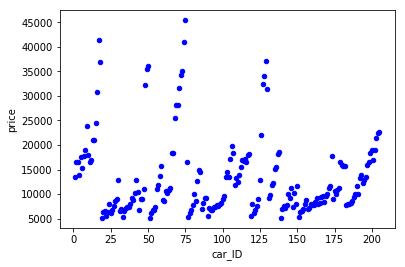

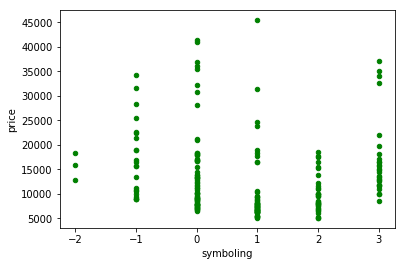

CarName column not valid for plot
fueltype column not valid for plot
aspiration column not valid for plot
doornumber column not valid for plot
carbody column not valid for plot
drivewheel column not valid for plot
enginelocation column not valid for plot


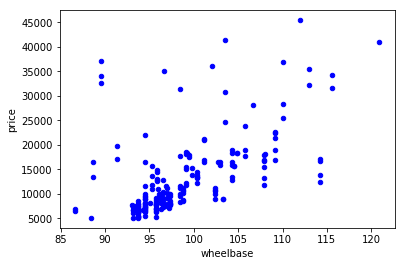

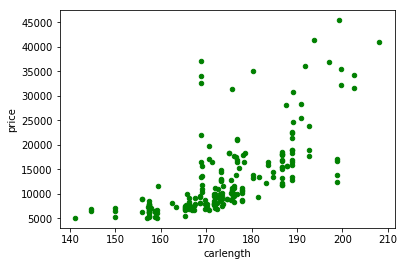

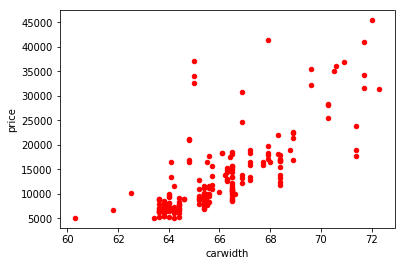

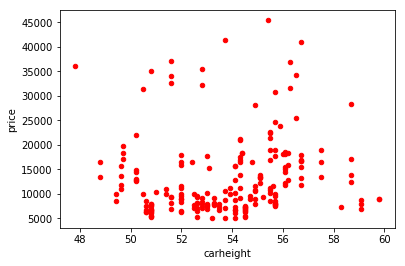

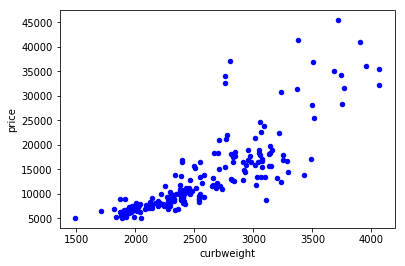

enginetype column not valid for plot
cylindernumber column not valid for plot


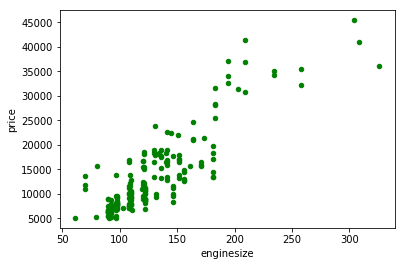

fuelsystem column not valid for plot


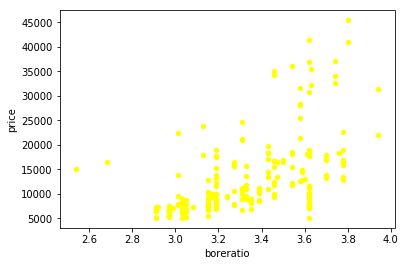

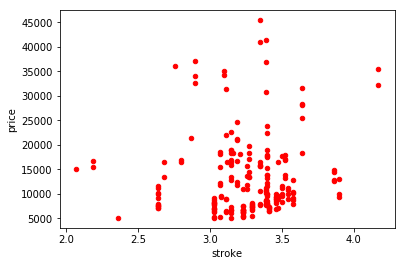

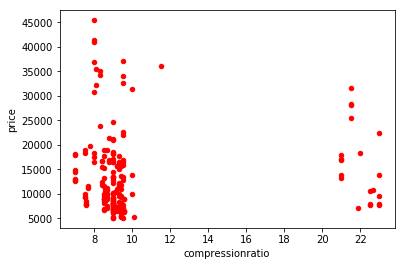

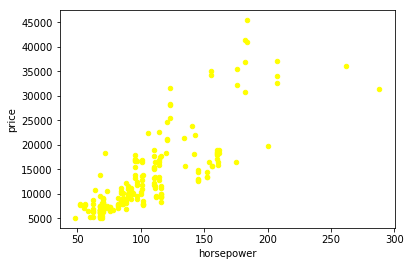

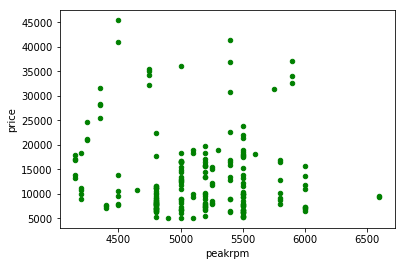

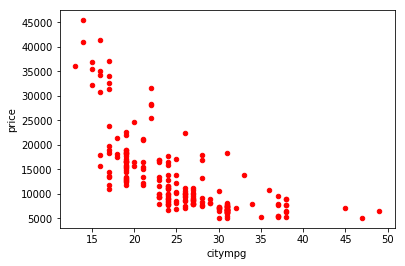

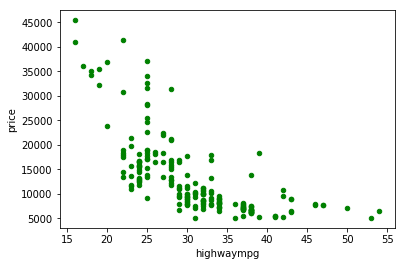

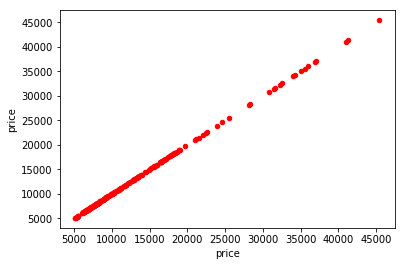

CarBrand column not valid for plot
CarModel column not valid for plot


In [14]:
"""Data Analysis to find the best parameter for prediction
plotting data with independent variable as other parameters and price as dependent variables
Exploratory Data Analysis (EDA)
"""
#Columns
colors = ['red', 'blue', 'green', 'yellow']
for col in car_price.columns:
    try:
        car_price.plot(kind='scatter',x=col,y='price',color=random.choice(colors))
        plt.show()
    except Exception as error:
        print('{0} column not valid for plot'.format(col))



In [24]:
corr_matrix = car_price.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

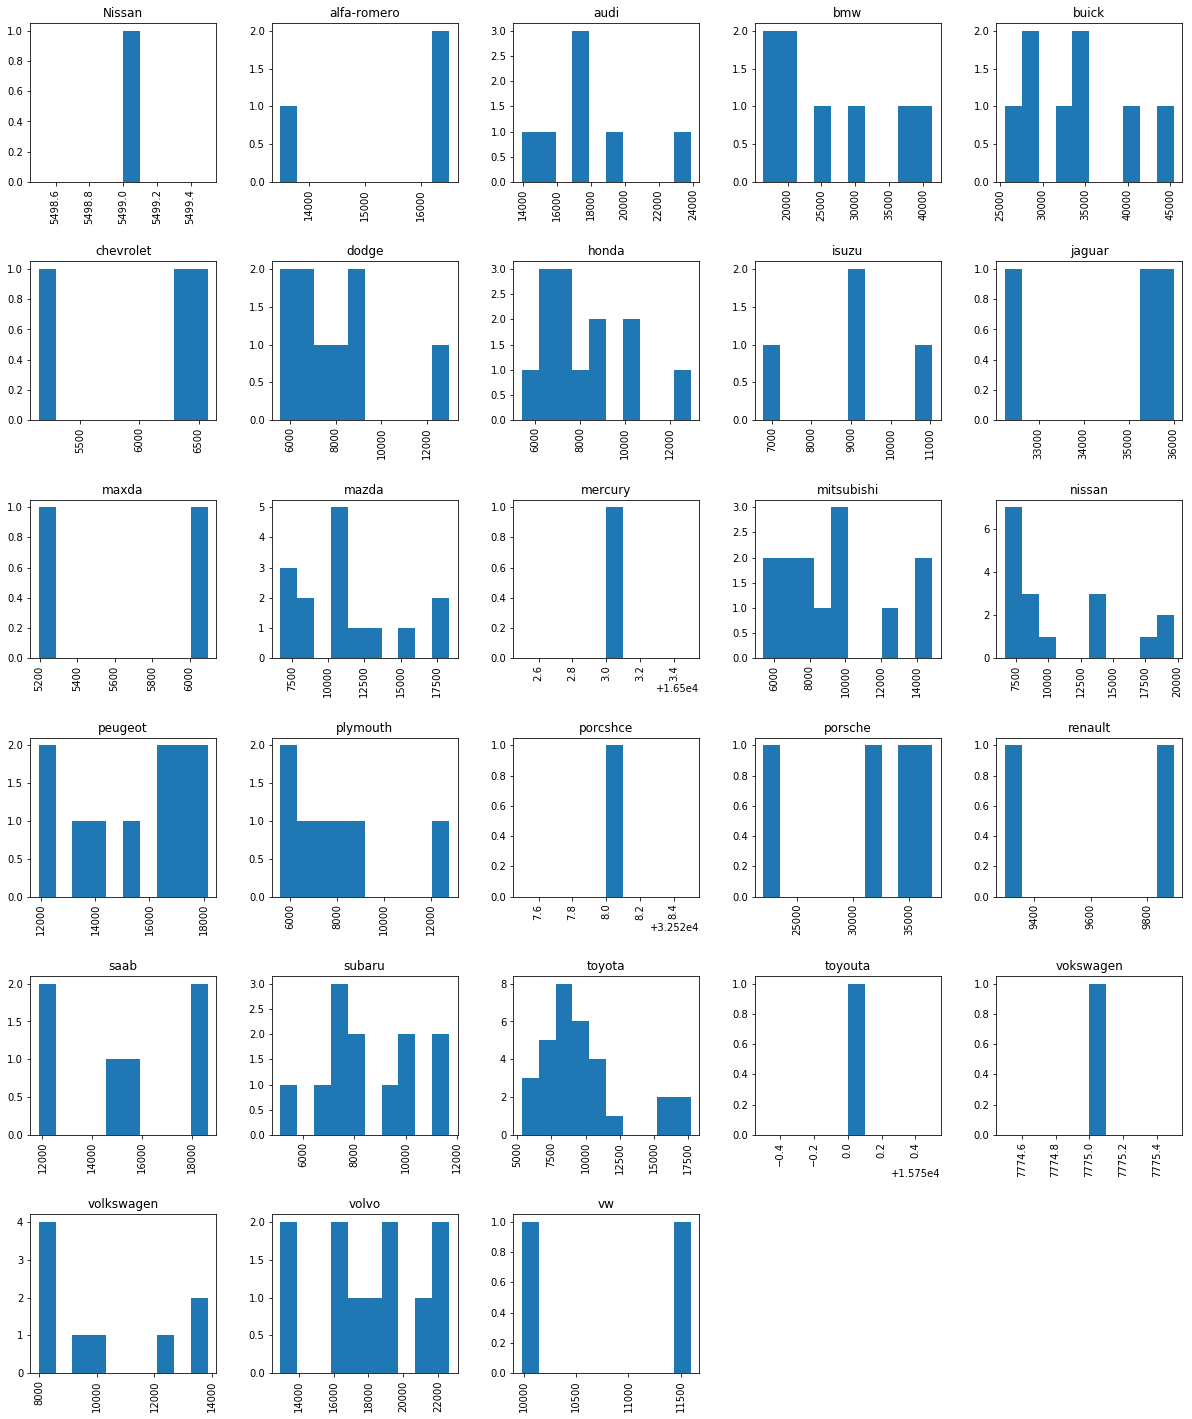

        CarBrand     price_range      price
0    alfa-romero  (10000, 15000]  13495.000
1    alfa-romero  (15000, 20000]  16500.000
2    alfa-romero  (15000, 20000]  16500.000
3           audi  (10000, 15000]  13950.000
4           audi  (15000, 20000]  17450.000
5           audi  (15000, 20000]  15250.000
6           audi  (15000, 20000]  17710.000
7           audi  (15000, 20000]  18920.000
8           audi  (20000, 25000]  23875.000
9           audi  (15000, 20000]  17859.167
10           bmw  (15000, 20000]  16430.000
11           bmw  (15000, 20000]  16925.000
12           bmw  (20000, 25000]  20970.000
13           bmw  (20000, 25000]  21105.000
14           bmw  (20000, 25000]  24565.000
15           bmw  (30000, 35000]  30760.000
16           bmw  (40000, 45000]  41315.000
17           bmw  (35000, 40000]  36880.000
18     chevrolet   (5000, 10000]   5151.000
19     chevrolet   (5000, 10000]   6295.000
20     chevrolet   (5000, 10000]   6575.000
21         dodge   (5000, 10000]

In [45]:
"""Analyse Car Brands Data with Price, using a Histogram"""
car_price.hist(column='price', by='CarBrand', figsize=(20,25))
plt.show()
"""Binning the price range and doing Brand analysis"""
bins = list(range(0,45001,5000))
car_price['price_range'] = pd.cut(car_price['price'], bins)
print(car_price[['CarBrand','price_range', 'price']])

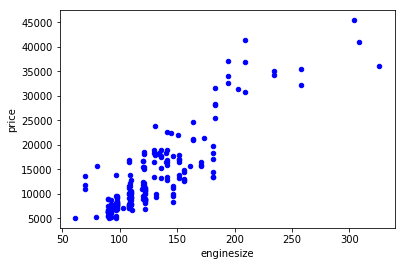

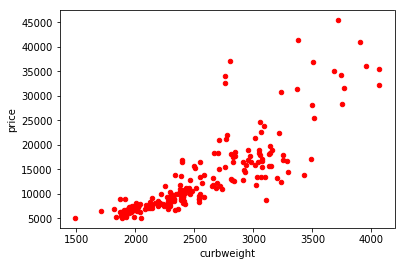

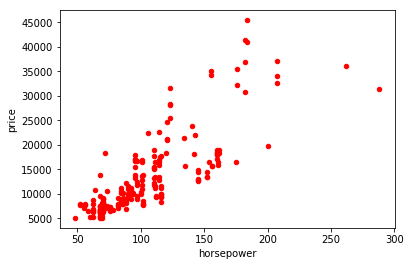

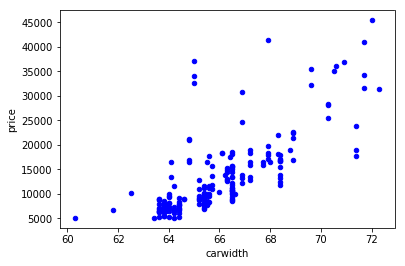

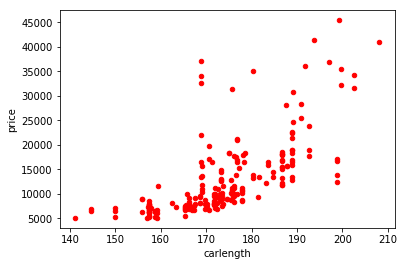

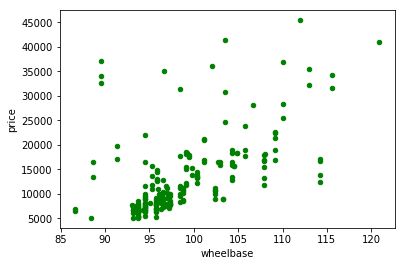

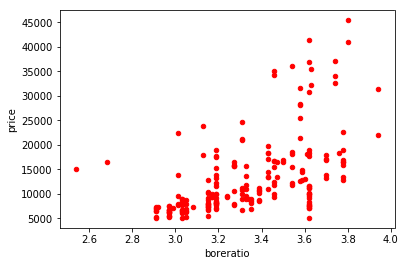

In [26]:
"""Using the EDA and the correlation Analysis result,
we can see the parameters - 
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
have better correlation to dependent variable - price
taking ther correlation threshold as 0.5, we get 7 major parameters for prediction"""
#Columns
colors = ['red', 'blue', 'green', 'yellow']
promising_cols = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio']
for col in promising_cols:
    car_price.plot(kind='scatter',x=col,y='price',color=random.choice(colors))
    plt.show()

In [38]:
"""Process the Test and Train Dataset"""
X = car_price[promising_cols]
Y = car_price['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [40]:
"""Starting the Liner Regression using scikit learn module"""
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
"""Calculate RSS"""
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8108


In [44]:
y_pred[0:5]

array([ 6065.89862803, 20380.77142681, 14135.84358444,  -235.16527804,
       10784.61989947])

Coefficients: 
 [ 66.04806256   3.08106075  66.64436165 735.76849249 -75.60223031
  39.3841998   68.08123892]
Intercept: 
 -49426.689919123564
Mean squared error: 12493117.89
Variance score: 0.81


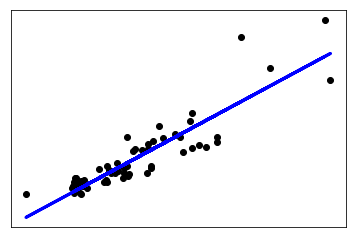

In [57]:
"""Post prediction Analysis for each independent paramter, to select the best."""
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The intercept
print('Intercept: \n', regressor.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(regressor.predict(X_test), y_test,  color='black')
plt.plot(regressor.predict(X_test), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()